# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Содержание: 
* [Шаг 1. Подготовка данных¶](#1.)
* [  Импорты](#1.1)
* [  Смотрим наш датафрейм](#1.2)
* [  Обзор общей информации по датафрейму и кол-во пропусков ](#2.1)
* [ Смотрим описательную статистику. ](#2.2)
* [  Убираем аномалии](#2.3)
* [ Иследуем autos](#3.1)
* [  Смотрим корреляцию ](#3.4)
* [   Выводы по 1 шагу:](#3.5)

- [Шаг 2. Обучение моделей ](#4.)


- [ Шаг 3. Анализируем данные](#5.)
- [ Шаг 4. Вывод по проекту:](#6.)


## Подготовка данных <a name="1.">

### Импорты <a name="1.1">

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import numpy as np
from sklearn.metrics import f1_score
from scipy import stats as st
from math import factorial
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
import phik

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import binom
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import math
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import svm

from sklearn.svm import SVC
#import kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [3]:
try:
    autos=pd.read_csv('/Users/konstantingrigorev/Desktop/autos.csv')
except:
    autos=pd.read_csv('/datasets/autos.csv')

### Смотрим  наш датафрейм   <a name="1.2">

In [4]:
autos

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


Загрузили данные, всё хорошо

### Обзор общей информации по датафрейму и кол-во пропусков  <a name="2.1">

In [5]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Видем много пропусков , с типами данными вроде всё хорошо

In [6]:
(autos.isna().mean()*100).sort_values()

DateCrawled           0.000000
Price                 0.000000
RegistrationYear      0.000000
Power                 0.000000
Kilometer             0.000000
RegistrationMonth     0.000000
Brand                 0.000000
DateCreated           0.000000
NumberOfPictures      0.000000
PostalCode            0.000000
LastSeen              0.000000
Model                 5.560588
Gearbox               5.596709
FuelType              9.282697
VehicleType          10.579368
Repaired             20.079070
dtype: float64

Вывели процент пропусков в данных, видем что в колонке ремонта боольше всего пропусков

### Смотрим описательную статистику  <a name="2.2">

In [7]:
autos.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Смотрим описательную статистику, можем сделать определенные выводы: 
- Видим аномалии в цене, потому есть машины за 0 евро, не думаю что отдают машины в дар, будем дальше исправлять это
- Год выпуска машины очень странный есть машина года выпуска во времена Рюрика, а так же машины из будущего, явные ошибки
- Мощность двигателя тоже с проблемами: емть машины с нулевой мощностью и машины с мощностью пасажирского самолета
- Столбец с фотками надо бдует удалить потому что он весь нулевой
- Месяц регистрации начинается с нуля, это ошибка

### Убираем аномалии <a name="2.3">

#### Price

<AxesSubplot:>

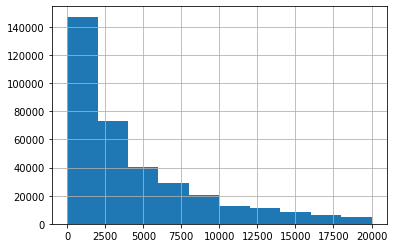

In [8]:
autos['Price'].hist()

In [9]:
autos.query('Price<100').head(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
40,2016-03-26 22:06:17,0,NaN,1990,NaN,0,corsa,150000,1,petrol,opel,NaN,2016-03-26 00:00:00,0,56412,2016-03-27 17:43:34
59,2016-03-29 15:48:15,1,suv,1994,manual,286,NaN,150000,11,NaN,sonstige_autos,NaN,2016-03-29 00:00:00,0,53721,2016-04-06 01:44:38
89,2016-03-28 09:37:01,1,sedan,1995,manual,113,e_klasse,150000,4,gasoline,mercedes_benz,no,2016-03-28 00:00:00,0,40589,2016-04-06 12:15:54
111,2016-03-19 18:40:12,0,NaN,2017,manual,0,golf,5000,12,petrol,volkswagen,NaN,2016-03-19 00:00:00,0,21698,2016-04-01 08:47:05


Убираем анкеты со стоимотстью ниже 100 евро, думаю что меньше 100 евро не найти машину

In [10]:
autos=autos.query('Price>100')

 #### RegistrationYear

In [11]:
autos.query('RegistrationYear<1960').head(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
15,2016-03-11 21:39:15,450,small,1910,NaN,0,ka,5000,0,petrol,ford,NaN,2016-03-11 00:00:00,0,24148,2016-03-19 08:46:47
1928,2016-03-25 15:58:21,7000,suv,1945,manual,48,other,150000,2,petrol,volkswagen,no,2016-03-25 00:00:00,0,58135,2016-03-25 15:58:21
2273,2016-03-15 21:44:32,1800,convertible,1925,NaN,0,NaN,5000,1,NaN,sonstige_autos,no,2016-03-15 00:00:00,0,79288,2016-04-07 05:15:34
3333,2016-03-15 21:36:20,10500,sedan,1955,manual,30,other,60000,0,petrol,ford,NaN,2016-03-15 00:00:00,0,53498,2016-04-07 08:16:11
6977,2016-03-24 08:37:22,135,NaN,1910,NaN,0,NaN,5000,0,NaN,opel,NaN,2016-03-24 00:00:00,0,19374,2016-04-06 20:46:08


Не думаю что есть раритеты старше 60 года, поэтому убираем их, а так же убираем машины из будущего

In [12]:
autos.query('RegistrationYear>2020').sample()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
334967,2016-03-20 17:53:51,12000,NaN,4000,NaN,500,golf,5000,0,NaN,volkswagen,no,2016-03-20 00:00:00,0,57392,2016-04-07 00:46:30


In [13]:
autos['DateCrawled'] = pd.to_datetime(autos['DateCrawled'])

last_day = autos['DateCrawled'].max().date()


/tmp/ipykernel_514/2361620765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['DateCrawled'] = pd.to_datetime(autos['DateCrawled'])


In [14]:
autos.loc[autos['RegistrationYear'] > last_day.year, 'RegistrationYear'] = last_day.year


/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [15]:
autos=autos.query('RegistrationYear>1960')

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Исправлено.
</div>

<AxesSubplot:>

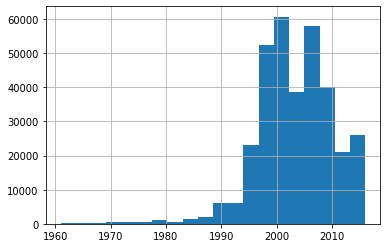

In [16]:
autos['RegistrationYear'].hist(bins=20)

#### Power

In [17]:
autos= autos.query('Power>=20 and Power<=600')
autos= autos.query('RegistrationMonth>0')


Убираем аномальные значение мощности

### Смотрим и исследуем датафрейм autos по гистограммам <a name="3.1">

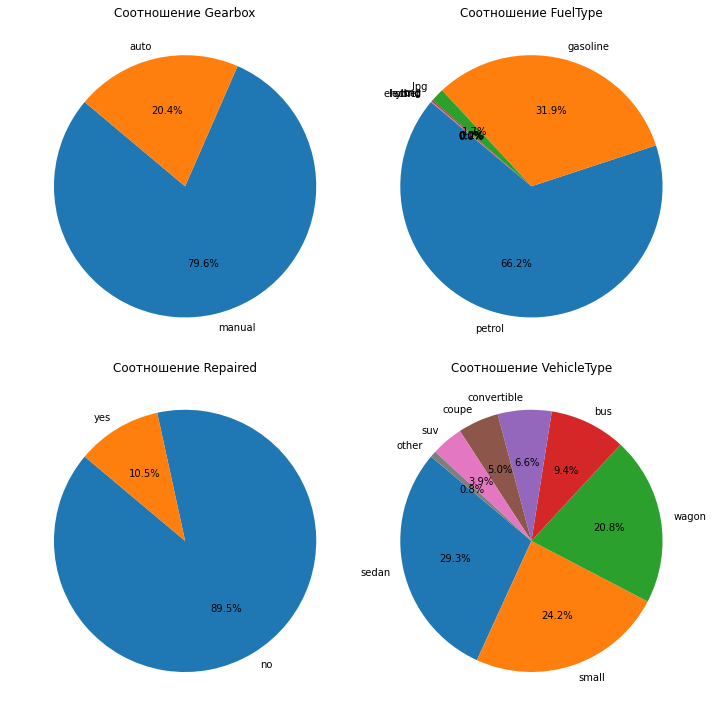

In [18]:
def aotos_graph(column, title='', label='', ax=None):
    if ax is None:
        plt.figure(figsize=(5, 5))
    else:
        plt.sca(ax)


    plt.title(title)
    counts = autos[column].value_counts()
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.ylabel(label)

columns_to_plot = ['Gearbox', 'FuelType', 
                   'Repaired','VehicleType'  ]
num_columns = len(columns_to_plot)
num_rows = (num_columns + 1) // 2  

fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows * 5))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    aotos_graph(column, title=f'Соотношение {column}', label=' ', ax=axes[i])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Рассмотрим категориальные графики:
- В основном на рынке продают машины с механичческой коробкой передач
- Машины в основном продаются без ремонта
- В основном машины на бензине, а дальше идут дизель и бензин
- В основном машины на рынке предствлены седанами, универсалами или маленькими машинами

##### Из-за бооьшого количества брендов и моделей я сделал диаграмму на которой будет показаны топ 7 самых популярных брендов или моделей, а остальные будут добавлены в категорию ОСТАЛЬНЫЕ

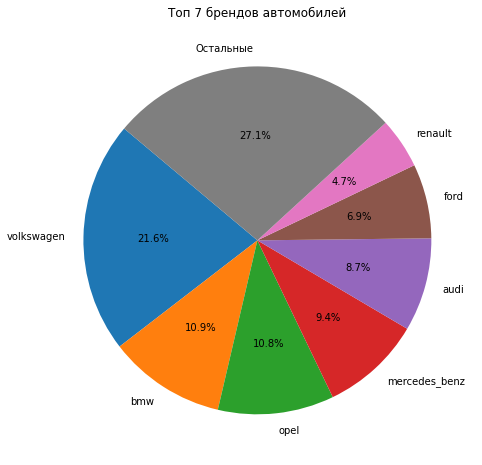

In [19]:
top_brands = autos['Brand'].value_counts().head(7) 
other_brands_count = autos['Brand'].value_counts().sum() - top_brands.sum()  
other_brands = pd.Series(other_brands_count, index=['Остальные']) 

brands_combined = top_brands.append(other_brands)

plt.figure(figsize=(8, 8))
plt.pie(brands_combined, labels=brands_combined.index, autopct='%1.1f%%', startangle=140)
plt.title('Топ 7 брендов автомобилей')
plt.show()

Видно что рынок немецкий или австрийский по моим предположениям, в основном люди продают и покупают немецкие автомобили, вольсваген, бмв, мерседес, ауди, так же идим большое процент фрацузских опелей

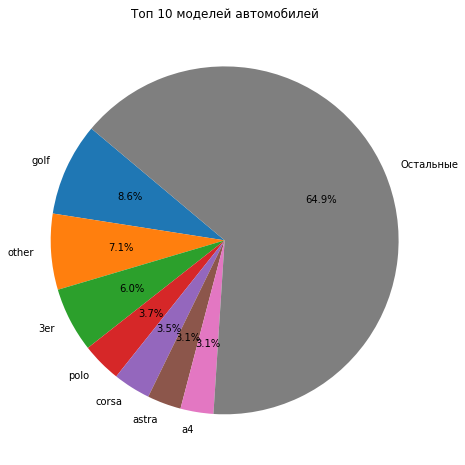

In [20]:
top_brands = autos['Model'].value_counts().head(7) 
other_brands_count = autos['Model'].value_counts().sum() - top_brands.sum() 
other_brands = pd.Series(other_brands_count, index=['Остальные']) 

brands_combined = top_brands.append(other_brands)

plt.figure(figsize=(8, 8))
plt.pie(brands_combined, labels=brands_combined.index, autopct='%1.1f%%', startangle=140)
plt.title('Топ 10 моделей автомобилей')
plt.show()

Среди моделей видим самые популяерные в виде гольфа, поло, астра, корса

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


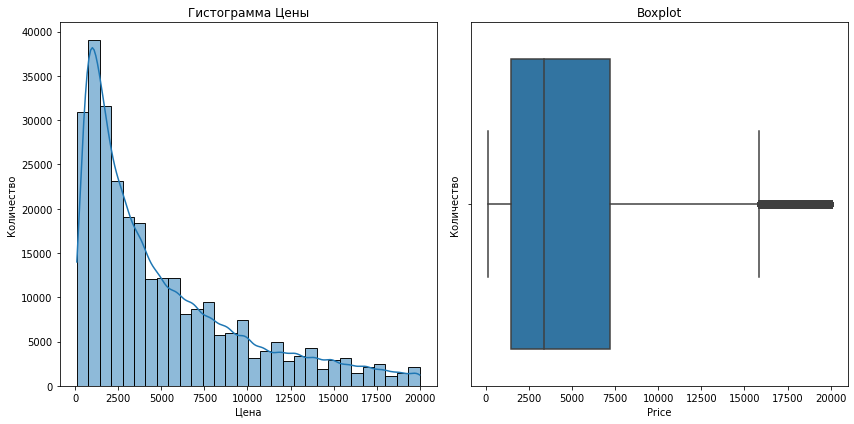

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


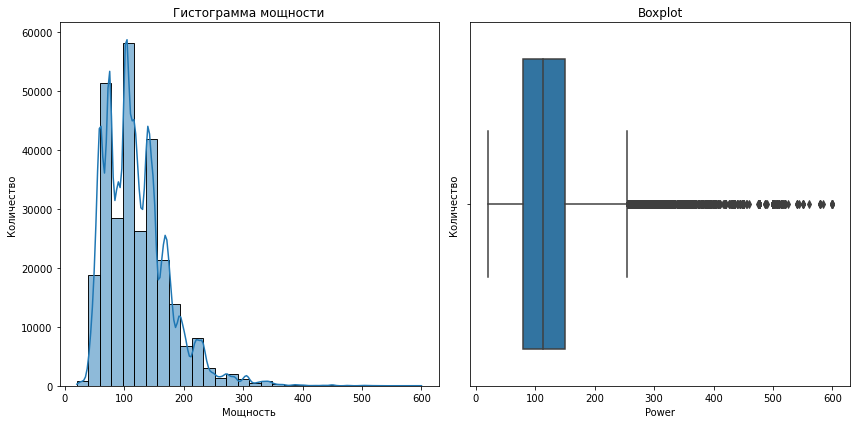

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


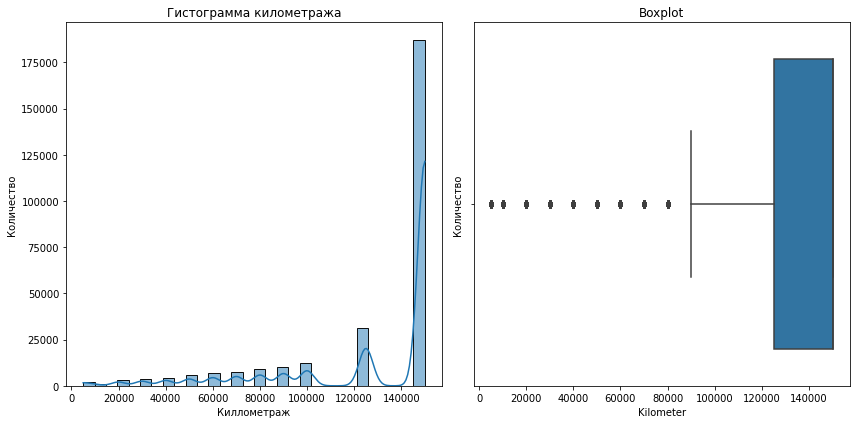

In [21]:
def plot_histogram_and_boxplot(data, column, title='', xlabel='', ylabel=''):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.subplot(1, 2, 2)
    sns.boxplot(data[column], orient='v')
    plt.title('Boxplot')
    plt.ylabel(ylabel)
    
    plt.tight_layout()
    plt.show()

columns_to_plot = ['Price', 'Power', 'Kilometer']
title_to_plot = ['Гистограмма Цены', 'Гистограмма мощности', 'Гистограмма километража']
xlabel_to_plot = ['Цена', 'Мощность', 'Киллометраж']
ylabel_to_plot = ['Количество', 'Количество', 'Количество']

for column, title, xlabel, ylabel in zip(columns_to_plot, title_to_plot, xlabel_to_plot, ylabel_to_plot):
    plot_histogram_and_boxplot(autos, column, title=title, xlabel=xlabel, ylabel=ylabel)

РАссмотрим количесвтенные гистограммы:
- Гистограмма цены, видно что медиана цены где-то около 3 тысяч долларов, на рынке много дешевых поддержанных машин, чем больше цена тем гораздо меньше машин
- С гистограммой мощности всё хорошо, видно, что в оновном люди ездят на малолитражках с мощностью 100-120 лошадинных сил, а двигатели мощнее встречаются всё реже и реже
- Гистограмма километража получилось дискретной, видимо на сайте нельзя самомму выставить киллометраж

In [22]:
autos.drop(['LastSeen', 'DateCrawled', 'NumberOfPictures', 'DateCreated', 'PostalCode', 'RegistrationMonth','Brand'], inplace=True, axis=1)

Предположил, что для постороения модели не виляют такие показатели как последняя активность покупателя, дата создания объявления, число фоток( у всех по 0 фоток), дата скачивания анкеты из базы, почтовый индекс, и месяц регистрации, нужен только год


#### Проверка на дубликаты 

In [23]:
autos.duplicated().sum()

37766

In [24]:
autos

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Repaired
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,no
5,650,sedan,1995,manual,102,3er,150000,petrol,yes
...,...,...,...,...,...,...,...,...,...
354361,5250,NaN,2016,auto,150,159,150000,NaN,no
354362,3200,sedan,2004,manual,225,leon,150000,petrol,yes
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,no
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,no


Вот такое вот количество дубликатов после удаления колонок, у нас 10% дубликатов, довольно много, но их надо удлаить чтобы построить модель.

In [25]:
autos=autos.drop_duplicates()

После удаления колонок, удалим дубликаты

### Построение матрицы корреляцииm<a name="3.4">

In [26]:
correlation_matrix = autos.phik_matrix(interval_cols=['Price', 'Power'])

<AxesSubplot:>

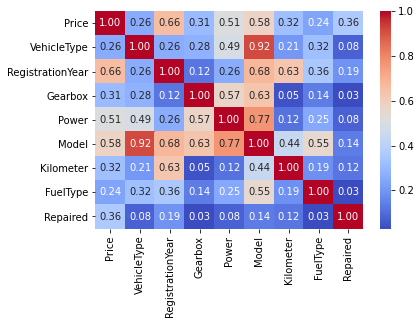

In [27]:
 sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

#### Рассмотрим матрицу корреляции 
Наиболее значимые корреляции:
- Цена: Положительная корреляция: Год регистрации, Мощность, Модель

- Год регистрации Положительная корреляция: Мощность, Пробег
- Коробка передач:Положительная корреляция: Цена, модель
- Бренд и тип машины и бренд и год выпуска.
### Возник вопрос: что делать с брендом и моделью, что из этого стоит удалить.?


## Вывод по первой главе:  <a name="3.5">


1. **Пропуски и типы данных:** 
   - Обнаружены пропущенные значения в некоторых столбцах, однако типы данных в основном соответствуют ожиданиям.

2. **Аномалии в данных:**
   - В данных наблюдаются аномалии в столбцах с ценой, годом выпуска и мощностью двигателя, что требует дальнейшей обработки.
   - Из данных удаляются аномальные значения и дубликаты, а также некорректные столбцы, такие как столбец с фотографиями.
   - Также удаляются анкеты с ценой ниже 100 евро и раритетные машины старше 60 лет.
   - Проводится обработка категориальных данных и приведение их к удобному для анализа формату.

4. **Анализ категориальных данных:**
   - На рынке преобладают автомобили с механической коробкой передач, большинство машин продаются без ремонта и на бензине.
   - Популярными моделями являются Volkswagen Golf, Volkswagen Polo, Opel Astra и Opel Corsa.
   - Большинство автомобилей на рынке - немецкого производства, также есть представители французских марок.

5. **Анализ количественных данных:**
   - Медианная цена автомобиля составляет около 3 тысяч долларов, при этом на рынке присутствует большое количество дешевых подержанных машин.
   - Большинство автомобилей имеют мощность от 100 до 120 лошадиных сил, а более мощные двигатели встречаются реже.
   - Гистограмма километража получилась дискретной, что может свидетельствовать о некорректных данных или ограничениях в интерфейсе для ввода километража.




## Обучение моделей <a name="4.">

In [28]:
RANDOM_STATE=42
TEST_SIZE = 0.25
X = autos.drop( 'Price', axis=1)
y = autos['Price']

<div class="alert alert-warning">
<b>Комментарий 👉</b>



Обычно я set'ы, настройки и константы также размещаю в ячейке с импортами, в её конце. Пример скрина моего текущего рабочего проекта:

</div>

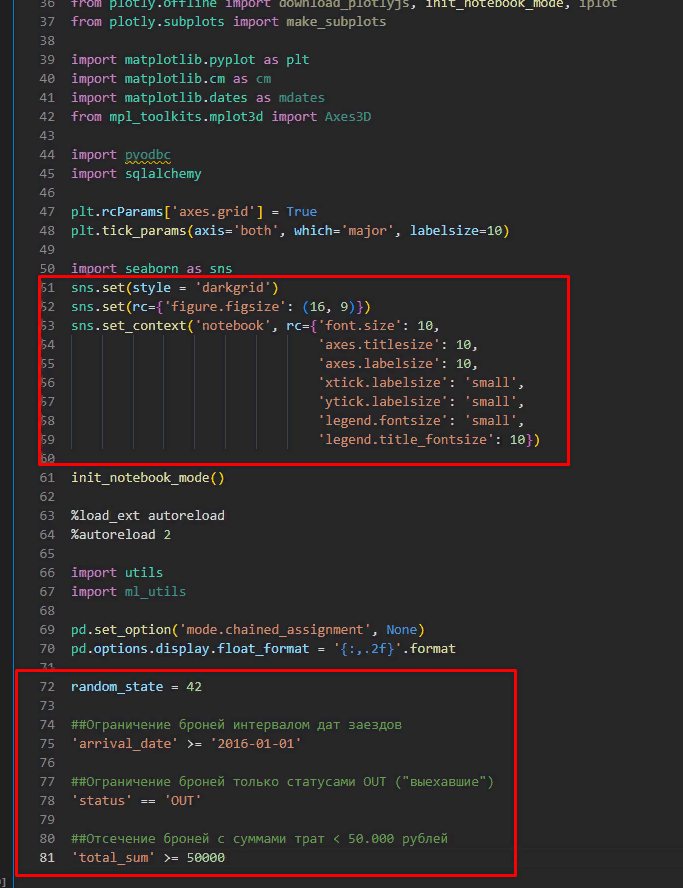

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)


In [30]:
cat_col_names = [
    'VehicleType', 
    'Gearbox',
    'Model',
    'FuelType',
    'Repaired'
]


num_col_names = ['RegistrationYear',
               'Power',
               'Kilometer'
              ] 


Предположил что нам ORD не нужен потому что нету градации параметров, все на одном уровне, все делаем через num & ohe

In [31]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])


cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(handle_unknown='ignore')) 
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_col_names),
    ('cat', cat_pipeline, cat_col_names)
])

models = [
    ('Linear Regression', LinearRegression()),
    ('CatBoost Regressor', CatBoostRegressor(iterations=100, learning_rate=0.05, depth=5, verbose=0)),
    ('LGBM Regressor', LGBMRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, n_jobs=-1))
]

for name, model in models:
    print(f"Training {name}...")
    start_time = time.time() 
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    end_time = time.time() 
    execution_time = end_time - start_time 
    
    print(f"{name} RMSE: {rmse}")
    print(f"{name} Execution Time: {execution_time} seconds")

Training Linear Regression...
Linear Regression RMSE: 2719.3749525774515
Linear Regression Execution Time: 11.701166868209839 seconds
Training CatBoost Regressor...
CatBoost Regressor RMSE: 2072.9101375703117
CatBoost Regressor Execution Time: 3.308103561401367 seconds
Training LGBM Regressor...
LGBM Regressor RMSE: 1932.916217252713
LGBM Regressor Execution Time: 4.9371278285980225 seconds


Две модели CatBoost и LGBM Regressor показывают приемлемые результаты прогнозирования, CatBoost Regressor и LGBM Regressor демонстрируют более низкую ошибку и более быстрое время обучения по сравнению с линейной регрессией.
##### CatBoost Regressor и LGBM Regressor более предпочтительными вариантами для прогнозирования цен.

#### Самой быстрой моделью получилась LGBM Regressor

## Анализ моделей  <a name="5.">

In [32]:
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType',  'Repaired']
num_features = ['RegistrationYear', 'Power', 'Kilometer']

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

LGBMRegressor_model = LGBMRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, n_jobs=-1)

LGBMRegressor_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LGBMRegressor_model)
])


LGBMRegressor_pipe.fit(X_train, y_train) 
score = LGBMRegressor_pipe.score(X_test, y_test) 
print(f"LGBMRegressor R^2 score: {score}")

LGBMRegressor R^2 score: 0.8279603352662634


Коэффициент детерминации R2 для модели LGBMRegressor составляет  0.844. Этот показатель указывает на то, что примерно 84.4% объяснено или предсказано с использованием LGBMRegressor.

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

+
</div>

In [ ]:

X_train, X_intermediate, y_train, y_intermediate = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
X_valid, X_test, y_valid, y_test = train_test_split(X_intermediate, y_intermediate, test_size=0.5, random_state=RANDOM_STATE)

cat_col_names = ['VehicleType', 'Gearbox', 'Model', 'FuelType',  'Repaired']
num_col_names = ['RegistrationYear', 'Power', 'Kilometer']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(handle_unknown='ignore')) 
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_col_names),
    ('cat', cat_pipeline, cat_col_names)
])

models = [
    ('Linear Regression', LinearRegression()),
    ('CatBoost Regressor', CatBoostRegressor(iterations=100, learning_rate=0.05, depth=5, verbose=0)),
    ('LGBM Regressor', LGBMRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, n_jobs=-1))
]

best_model = None
best_rmse = float('inf')
best_execution_time = float('inf')

for name, model in models:
    print(f"Training {name}...")
    start_time = time.time() 
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)  
    
    start_predict_time = time.time()
    y_pred_valid = pipeline.predict(X_valid)
    end_predict_time = time.time()
    
    rmse_valid = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
    
    execution_time = end_predict_time - start_time 
    
    print(f"{name} RMSE на валидации: {rmse_valid}")
    print(f"{name} Время выполнения: {execution_time} секунд")
    
    if rmse_valid < best_rmse or (rmse_valid == best_rmse and execution_time < best_execution_time):
        best_model = pipeline
        best_rmse = rmse_valid
        best_execution_time = execution_time

print(f"Best Model RMSE на валидации: {best_rmse}")
print(f"Best Model Время выполнения: {best_execution_time} секунд")

y_pred_test = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Best Model RMSE на тестовой выборке: {test_rmse}")

Training Linear Regression...


In [ ]:
feature_importances = LGBMRegressor_pipe.named_steps['model'].feature_importances_

encoded_cat_features = LGBMRegressor_pipe.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names(cat_features)
all_features = list(num_features) + list(encoded_cat_features)

feature_importance_dict = {feature: importance for feature, importance in zip(all_features, feature_importances)}

top_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:10]
top_feature_names = [feature[0] for feature in top_features]
top_feature_importances = [feature[1] for feature in top_features]

plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, top_feature_importances)
plt.xlabel('Важность фичей')
plt.ylabel('Фичи')
plt.title('Toп 10 LGBMRegressor Признаков важности')
plt.show()

более важные:
- Repaired_no:
- Kilometer:
- Power:
- Registration_year:

По этим показателем модель чаще всего оценивает стоимость автомобился

### Вывод:  <a name="6.">

1. **Пропуски и типы данных:** 
   - Обнаружены пропущенные значения в некоторых столбцах, однако типы данных в основном соответствуют ожиданиям.

2. **Аномалии в данных:**
   - В данных наблюдаются аномалии в столбцах с ценой, годом выпуска и мощностью двигателя, что требует дальнейшей обработки.
   - Из данных удаляются аномальные значения и дубликаты, а также некорректные столбцы, такие как столбец с фотографиями.
   - Также удаляются анкеты с ценой ниже 100 евро и раритетные машины старше 60 лет.
   - Проводится обработка категориальных данных и приведение их к удобному для анализа формату.

4. **Анализ категориальных данных:**
   - На рынке преобладают автомобили с механической коробкой передач, большинство машин продаются без ремонта и на бензине.
   - Большинство автомобилей на рынке - немецкого производства, также есть представители французских марок.

5. **Анализ количественных данных:**
   - Медианная цена автомобиля составляет около 3 тысяч долларов, при этом на рынке присутствует большое количество дешевых подержанных машин.
   - Большинство автомобилей имеют мощность от 100 до 120 лошадиных сил, а более мощные двигатели встречаются реже.
   - Гистограмма километража получилась дискретной, что может свидетельствовать о некорректных данных или ограничениях в интерфейсе для ввода километража.
5. **Анализ бустинга и обучения машинного обучения:**
   - Проведенный анализ данных выявил проблемы, такие как пропуски и аномалии. Для прогнозирования цен были использованы три модели: CatBoost, LGBM Regressor и линейная регрессия.

   - CatBoost показал наилучшее время обучения, а LGBM Regressor - наилучшую точность по метрике RMSE. Линейная регрессия оказалась наименее эффективной. Коэффициент детерминации R2 для LGBMRegressor составил 0.844

При финальном выборе заказчику следует обратить внимание на LGBM Regressor она дает минимальную ошибку, однако если делать акцент по времени работы стоит обратить внимание CatBoost